# Exploración de Datos

Este notebook carga y explora los datos del dataset de resultados de futbol internacional entre los años 1872 y 2017.

Los archivos son:

1. result.csv
2. goalscorers.csv
3. former_names.csv
4. shootouts.csv

Los datos se cargan desde un archivo .zip local subidos manualmente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Cargar el archivo .zip del Dataset

In [2]:
uploaded = files.upload()

Saving archive.zip to archive.zip


Se descomprime el archivo

In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: former_names.csv        
  inflating: goalscorers.csv         
  inflating: results.csv             
  inflating: shootouts.csv           


Cargar los Datasets

In [4]:
df_results = pd.read_csv('results.csv')
df_goalscorers = pd.read_csv('goalscorers.csv')
df_former_names = pd.read_csv('former_names.csv')
df_shootouts = pd.read_csv('shootouts.csv')

Mostrar la dimensiones de cada set

In [5]:
print("Resultados: ", df_results.shape)
print("Goleadores: ", df_goalscorers.shape)
print("Nombres Antiguos: ", df_former_names.shape)
print("Penales: ", df_shootouts.shape)

Resultados:  (48532, 9)
Goleadores:  (44447, 8)
Nombres Antiguos:  (34, 4)
Penales:  (653, 5)


Vista inicial de cada Dataset

In [6]:
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
df_goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [8]:
df_former_names.head()

,current,former,start_date,end_date
0,Benin,Dahomey,1959-11-08,1975-11-30
1,Burkina Faso,Upper Volta,1960-04-14,1984-08-04
2,Curaçao,Netherlands Antilles,1957-03-03,2010-10-10
3,Czechoslovakia,Bohemia,1903-04-05,1919-01-01
4,Czechoslovakia,Bohemia and Moravia,1939-01-01,1945-05-01


In [9]:
df_shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


Información general de cada Dataset

In [10]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48532 entries, 0 to 48531
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48532 non-null  object
 1   home_team   48532 non-null  object
 2   away_team   48532 non-null  object
 3   home_score  48532 non-null  int64 
 4   away_score  48532 non-null  int64 
 5   tournament  48532 non-null  object
 6   city        48532 non-null  object
 7   country     48532 non-null  object
 8   neutral     48532 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [11]:
df_goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44447 entries, 0 to 44446
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44447 non-null  object 
 1   home_team  44447 non-null  object 
 2   away_team  44447 non-null  object 
 3   team       44447 non-null  object 
 4   scorer     44399 non-null  object 
 5   minute     44191 non-null  float64
 6   own_goal   44447 non-null  bool   
 7   penalty    44447 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [12]:
df_former_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   current     34 non-null     object
 1   former      34 non-null     object
 2   start_date  34 non-null     object
 3   end_date    34 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [13]:
df_shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           653 non-null    object
 1   home_team      653 non-null    object
 2   away_team      653 non-null    object
 3   winner         653 non-null    object
 4   first_shooter  236 non-null    object
dtypes: object(5)
memory usage: 25.6+ KB


Resumen estadistico

In [14]:
df_results.describe(include='all')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
count,48532,48532,48532,48532.000000,48532.000000,48532,48532,48532,48532
unique,16348,325,318,NaN,NaN,188,2115,268,2
top,2012-02-29,Brazil,Uruguay,NaN,NaN,Friendly,Kuala Lumpur,United States,False
freq,66,608,578,NaN,NaN,18116,736,1458,35751
mean,NaN,NaN,NaN,1.758180,1.181550,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.773101,1.400946,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN


In [15]:
df_goalscorers.describe(include='all')

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
count,44447,44447,44447,44447,44399,44191.000000,44447,44447
unique,4646,220,220,220,14366,NaN,2,2
top,2011-10-11,Brazil,Uruguay,Brazil,Cristiano Ronaldo,NaN,False,False
freq,145,1023,787,1051,108,NaN,43624,41472
mean,NaN,NaN,NaN,NaN,NaN,50.006721,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,26.356912,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,51.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN


In [16]:
df_former_names.describe(include='all')

,current,former,start_date,end_date
count,34,34,34,34
unique,27,34,34,34
top,DR Congo,Dahomey,1959-11-08,1975-11-30
freq,4,1,1,1


In [17]:
df_shootouts.describe(include='all')

,date,home_team,away_team,winner,first_shooter
count,653,653,653,653,236
unique,575,183,192,177,89
top,2016-06-03,South Africa,Egypt,South Korea,Colombia
freq,5,18,15,15,11


Búsqueda de valores nulos

In [18]:
print("Nulos en results.csv:")
display(df_results.isnull().sum())

print("\nNulos en goalscorers.csv:")
display(df_goalscorers.isnull().sum())

print("\nNulos en former_names.csv:")
display(df_former_names.isnull().sum())

print("\nNulos en shootouts.csv:")
display(df_shootouts.isnull().sum())

Nulos en results.csv:


,0
date,0
home_team,0
away_team,0
home_score,0
away_score,0
tournament,0
city,0
country,0
neutral,0



Nulos en goalscorers.csv:


,0
date,0
home_team,0
away_team,0
team,0
scorer,48
minute,256
own_goal,0
penalty,0



Nulos en former_names.csv:


,0
current,0
former,0
start_date,0
end_date,0



Nulos en shootouts.csv:


,0
date,0
home_team,0
away_team,0
winner,0
first_shooter,417


Búsqueda de valores duplicados

In [19]:
print("Duplicados en results: ", df_results.duplicated().sum())
print("Duplicados en goalscorers: ", df_goalscorers.duplicated().sum())
print("Duplicados en former_names: ", df_former_names.duplicated().sum())
print("Duplicados en shootouts: ", df_shootouts.duplicated().sum())

Duplicados en results:  0
Duplicados en goalscorers:  82
Duplicados en former_names:  0
Duplicados en shootouts:  0


Gráfica de distribución de goles

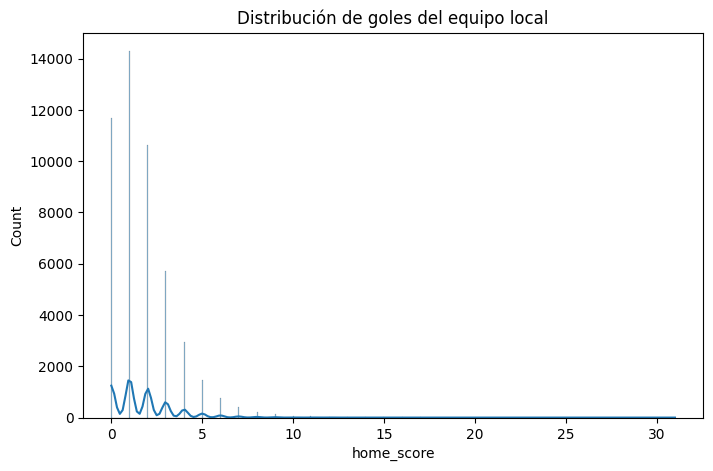

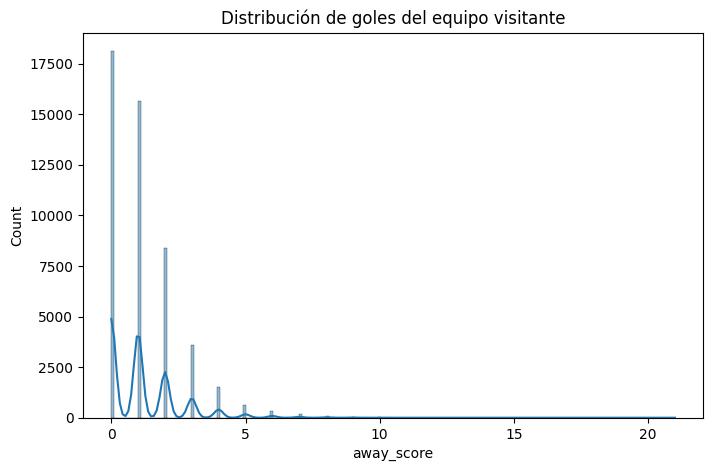

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df_results['home_score'], kde = True)
plt.title("Distribución de goles del equipo local")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_results['away_score'], kde = True)
plt.title("Distribución de goles del equipo visitante")
plt.show()

Número de partidos por año

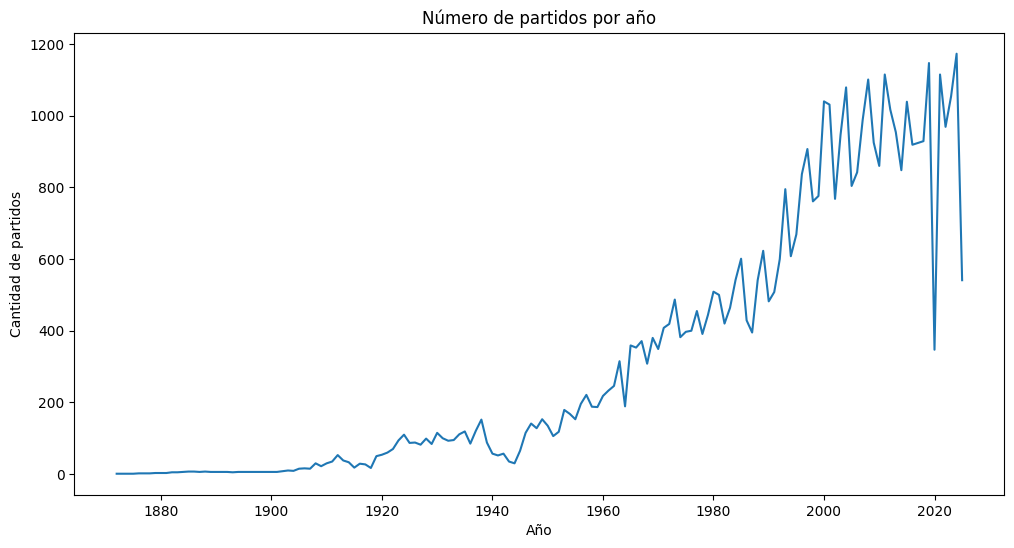

In [22]:
df_results['year'] = pd.to_datetime(df_results['date']).dt.year

plt.figure(figsize=(12,6))
df_results['year'].value_counts().sort_index().plot()
plt.title("Número de partidos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de partidos")
plt.show()